In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.set()

In [65]:
df = pd.read_csv("births.csv")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
df_m = df[df.gender=="M"]
df_m.head()

,year,month,day,gender,births
1,1969,1,1.0,M,4440
3,1969,1,2.0,M,4548
5,1969,1,3.0,M,4994
7,1969,1,4.0,M,4520
9,1969,1,5.0,M,4198


In [5]:
df_f = df[df.gender=="F"]
df_f.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
2,1969,1,2.0,F,4454
4,1969,1,3.0,F,4548
6,1969,1,4.0,F,4440
8,1969,1,5.0,F,4192


In [73]:
df = df[(df.day!=99.0) & (df.day!=31.0)]

In [67]:
df=df.dropna(axis=0)

In [91]:
df.isnull().sum()

df.day.value_counts()

df[df.births==df.births.max()]

,year,month,day,gender,births
14711,1988,7,7.0,M,6527


<AxesSubplot:xlabel='month'>

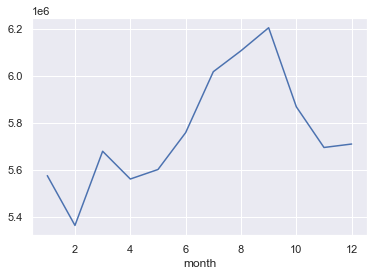

In [92]:
df.groupby(by=["month"]).births.sum().plot()


<AxesSubplot:xlabel='day'>

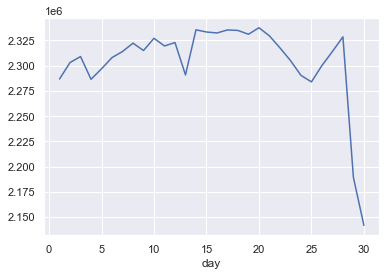

In [93]:

df.groupby(by=["day"]).births.sum().plot()



<AxesSubplot:xlabel='month,day'>

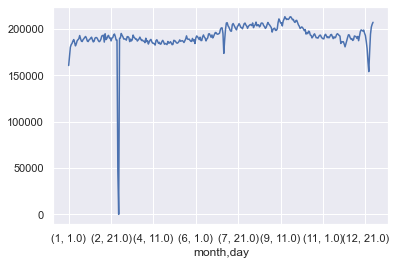

In [94]:
df.groupby(by=["month","day"]).births.sum().plot()


/var/folders/l3/k_wsxyrj4zd6g_9_4v6z8w200000gn/T/ipykernel_57392/3989192130.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birthsDate.index = [pd.datetime(2012, month, day) for (month, day) in birthsDate.index ]


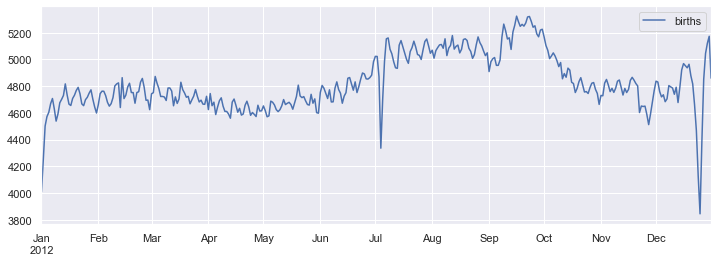

In [89]:
births = pd.read_csv("births.csv")
quartiles = np.percentile(births["births"],[25, 50, 75])
mean, sigma = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query("(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)")
births["day"] = births["day"].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = "%Y%m%d")
birthsDate = births.pivot_table("births", [births.index.month, births.index.day])
birthsDate.index = [pd.datetime(2012, month, day) for (month, day) in birthsDate.index ]
fig, ax = plt.subplots(figsize=(12, 4))
birthsDate.plot(ax=ax)
plt.show() 

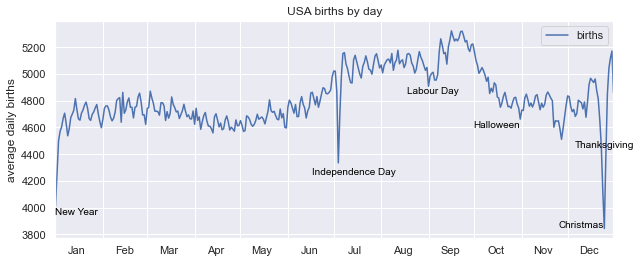

In [87]:
fig, ax = plt.subplots(figsize=(10,4))
birthsDate.plot(ax=ax)
style = dict(size=10, color='black')
ax.text("2012-1-1", 3950, "New Year", **style)
ax.text("2012-7-14", 4250, "Independence Day", ha="center", **style)
ax.text("2012-9-4", 4850, "Labour Day", ha="center", **style)
ax.text("2012-10-31", 4600, "Halloween", ha="right", **style)
ax.text("2012-12-25", 4450, "Thanksgiving", ha="center", **style)
ax.text("2012-12-25", 3850, "Christmas", ha="right", **style)
# Labeling the axes
ax.set(title= "USA births by day", ylabel="average daily births")
# Format the x axis with centerd month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%h"))
plt.show()

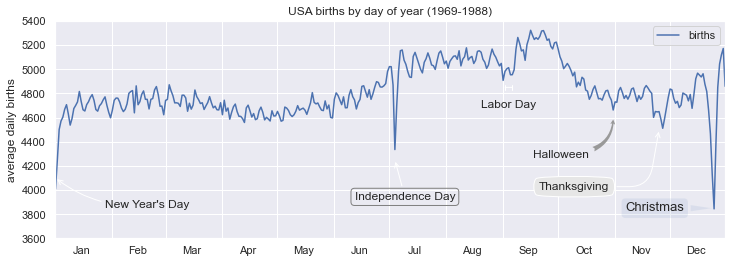

In [88]:
fig, ax = plt.subplots(figsize=(12, 4))
birthsDate.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400)
plt.show()

In [68]:
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [74]:
df.day.value_counts()

1.0     480
2.0     480
28.0    480
27.0    480
26.0    480
25.0    480
24.0    480
23.0    480
22.0    480
21.0    480
20.0    480
19.0    480
18.0    480
17.0    480
16.0    480
15.0    480
14.0    480
13.0    480
12.0    480
11.0    480
10.0    480
9.0     480
8.0     480
7.0     480
6.0     480
5.0     480
4.0     480
3.0     480
29.0    464
30.0    450
Name: day, dtype: int64